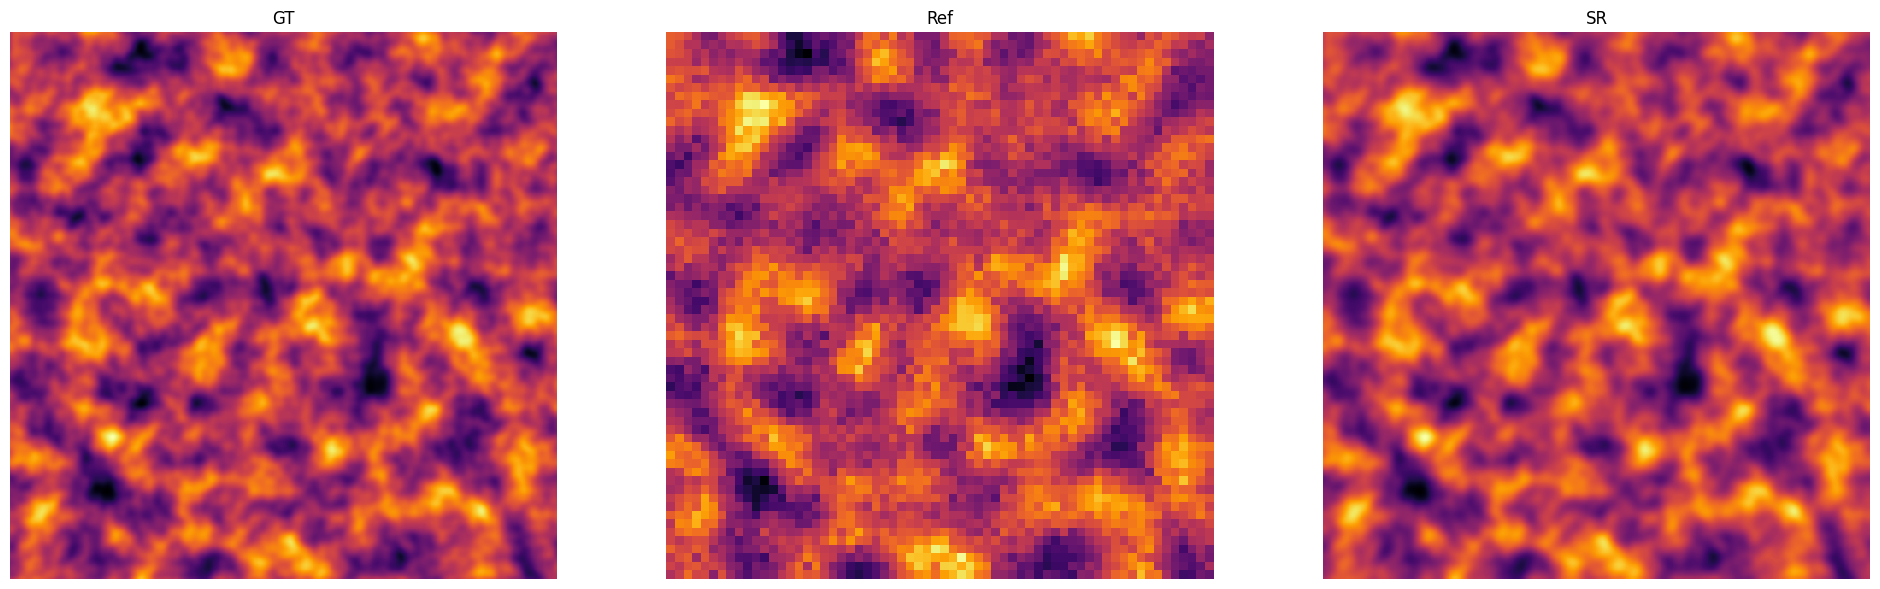

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from random import random
from numpy.random import randint
from scipy.ndimage import gaussian_filter
from nanopyx.core.transform.binning import rebin_2d
from nanopyx.core.image.add_random_noise import (
    add_mixed_gaussian_poisson_noise,
    add_perlin_noise,
)

# generate some random ground truth
w = 640
h = 640
image_gt = np.ones((w, h), dtype="float32") * 1000
add_perlin_noise(image_gt, amp=1000, f=10, octaves=3)

image_ref = gaussian_filter(image_gt, 15)
image_ref = rebin_2d(image_ref, 10, mode="mean")
# addRamp(image_ref, 1000)
add_mixed_gaussian_poisson_noise(image_ref, 10, 10)

image_sr = image_gt.copy()
image_sr = gaussian_filter(image_sr, 3)
# image_sr = rebin2d(image_sr, 10, mode="mean")


# Create a figure with 3 subplots arranged in a row
fig, axs = plt.subplots(1, 3, figsize=(24, 24))
sns.heatmap(image_gt, ax=axs[0], cmap='inferno', cbar=False,
            square=True, xticklabels=False, yticklabels=False)
sns.heatmap(image_ref, ax=axs[1], cmap='inferno', cbar=False,
            square=True, xticklabels=False, yticklabels=False)
sns.heatmap(image_sr, ax=axs[2], cmap='inferno', cbar=False,
            square=True, xticklabels=False, yticklabels=False)
axs[0].set_title("GT")
axs[1].set_title("Ref")
axs[2].set_title("SR")

# Show the figure
plt.show()


RSE: 29.22132968224474
RSP: 0.9559720754623413
Sigma: 14.939596887784742


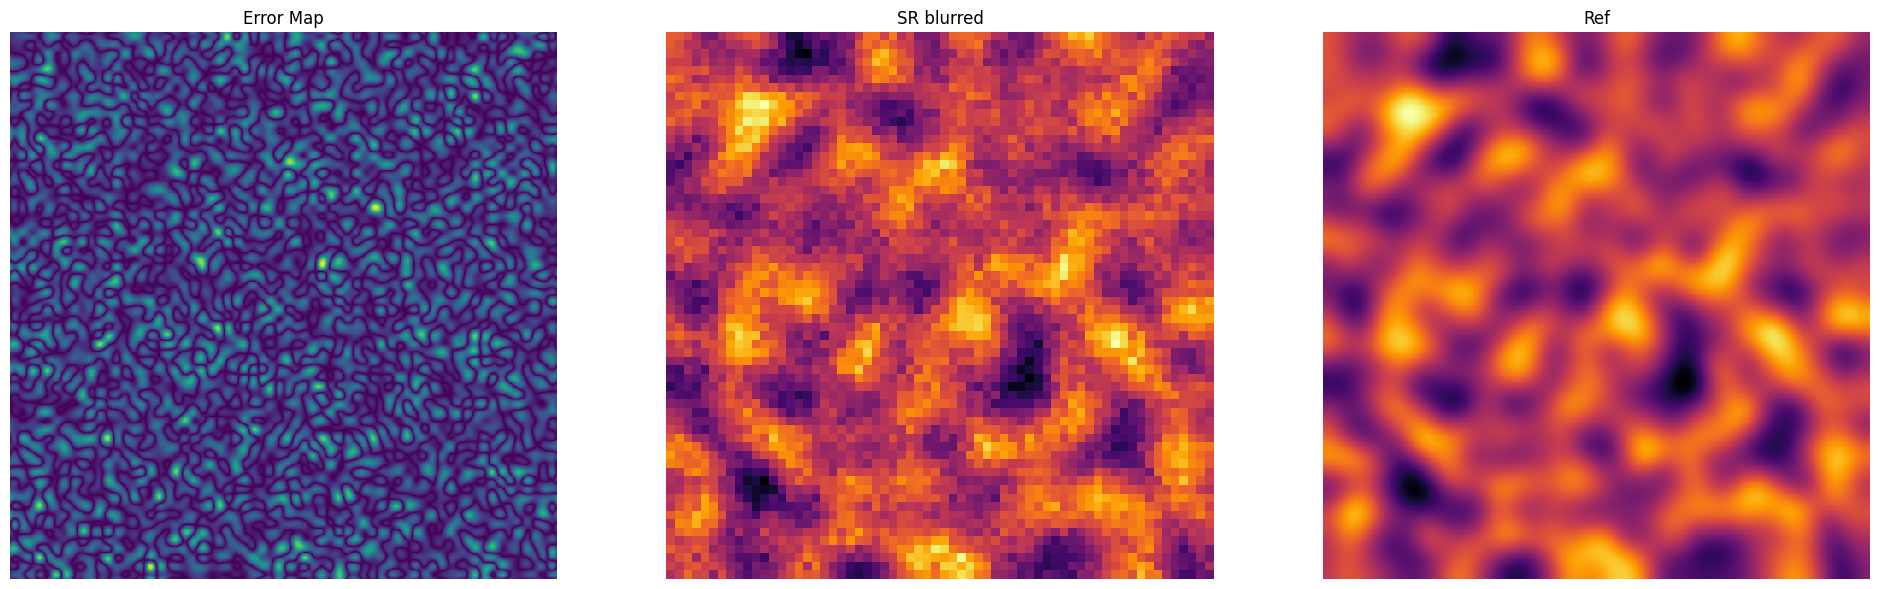

In [2]:
from nanopyx.core.sr.error_map import ErrorMap

squirrelErrorMap = ErrorMap()
squirrelErrorMap.optimise(image_ref, image_sr)

print(f"RSE: {squirrelErrorMap.getRSE()}")
print(f"RSP: {squirrelErrorMap.getRSP()}")
print(f"Sigma: {squirrelErrorMap.get_sigma()}")

# Create a figure with 3 subplots arranged in a row
fig, axs = plt.subplots(1, 3, figsize=(24, 24))

sns.heatmap(squirrelErrorMap.imRSE, ax=axs[0], cmap='viridis', cbar=False, square=True, xticklabels=False, yticklabels=False)
sns.heatmap(image_ref, ax=axs[1], cmap='inferno', cbar=False, square=True, xticklabels=False, yticklabels=False)
sns.heatmap(squirrelErrorMap.im_sr_intensity_scaled_blurred, ax=axs[2], cmap='inferno', cbar=False, square=True, xticklabels=False, yticklabels=False)
axs[0].set_title("Error Map")
axs[1].set_title("SR blurred")
axs[2].set_title("Ref")

# Show the figure
plt.show()
